<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/ExplNode08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **프로젝트: 고양이 수염 스티커 만들기**

# 1 개요

## 1-1. 목표
 얼굴의 다양한 각도, 크기 및 절단 여부에 따라, 2D 스티커를 적절히 합성한다.
 얼굴의 각도에 비례하여, 2D 스티커의 위치를 적절히 조절되게 한다.
 얼굴의 크기에 비례하여, 2D 스티커의 크기를 적절히 조절되게 한다.
 얼굴이 절단된 사진에 대해서, 2D 스티커도 적절히 절단시켜 합성한다.

## 1-2. 방법
 face landmark 인식: dlib의 pretrained model 파일이용

### dlibLandmarkOrder.png 보여주기
 각도: 9개 방향의 얼굴 사진을 사용
# 계산
 크기: 1/2 이하 얼굴 사진을 사용
# 계산
 절단: 한쪽 면이 잘린 얼굴 사진을 사용
# 계산

## 1-3. 사전준비

 ■ 주요 라이브러리 download

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib

 ■ 시험용 스티커 및 사진 download

In [2]:
 !rm -r /content/images
 !mkdir -p /content/images
 !wget -O /content/images_final.zip https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode08/images_final.zip
 !unzip /content/images_final.zip -d /content/images
 !rm /content/images_final.zip

rm: cannot remove '/content/images': No such file or directory
--2022-05-26 20:07:14--  https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode08/images_final.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258099 (252K) [application/zip]
Saving to: ‘/content/images_final.zip’

/content/images_fin 100%[===================>] 252.05K  --.-KB/s    in 0.03s   

2022-05-26 20:07:15 (8.22 MB/s) - ‘/content/images_final.zip’ saved [258099/258099]

Archive:  /content/images_final.zip
  inflating: /content/images/1.jpg   
  inflating: /content/images/2.jpg   
  inflating: /content/images/3.jpg   
  inflating: /content/images/3_1_flipped.jpg  
  inflating: /content/images/4.jpg   
  inflating: /content/images/5.jpg   
  inflating: /content/i

■ 시험용 스티커

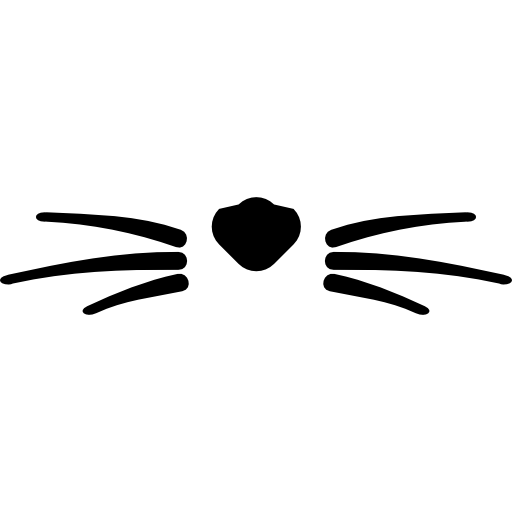

■ 시험용 사진: 각도 test용

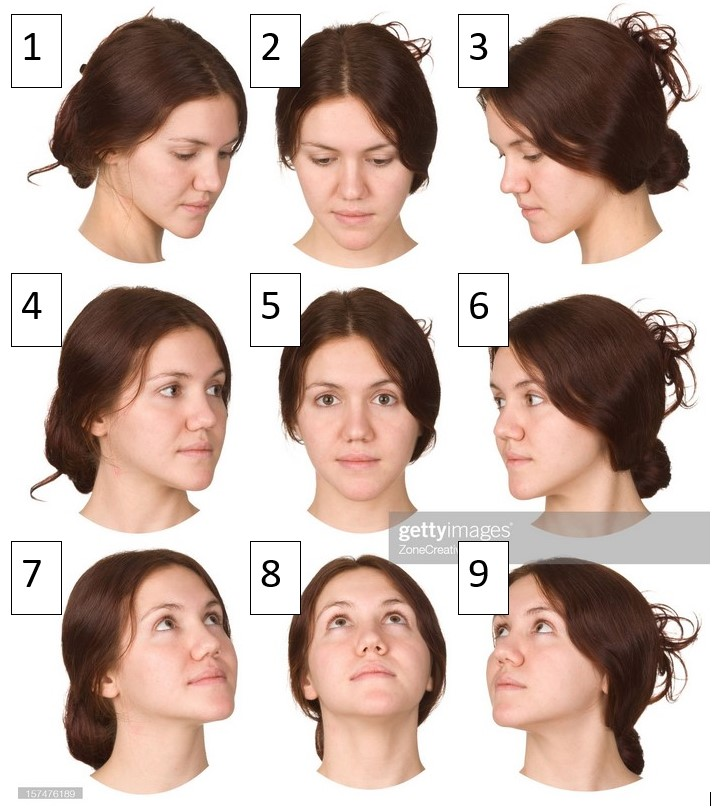

■ 시험용 사진: 크기 test용

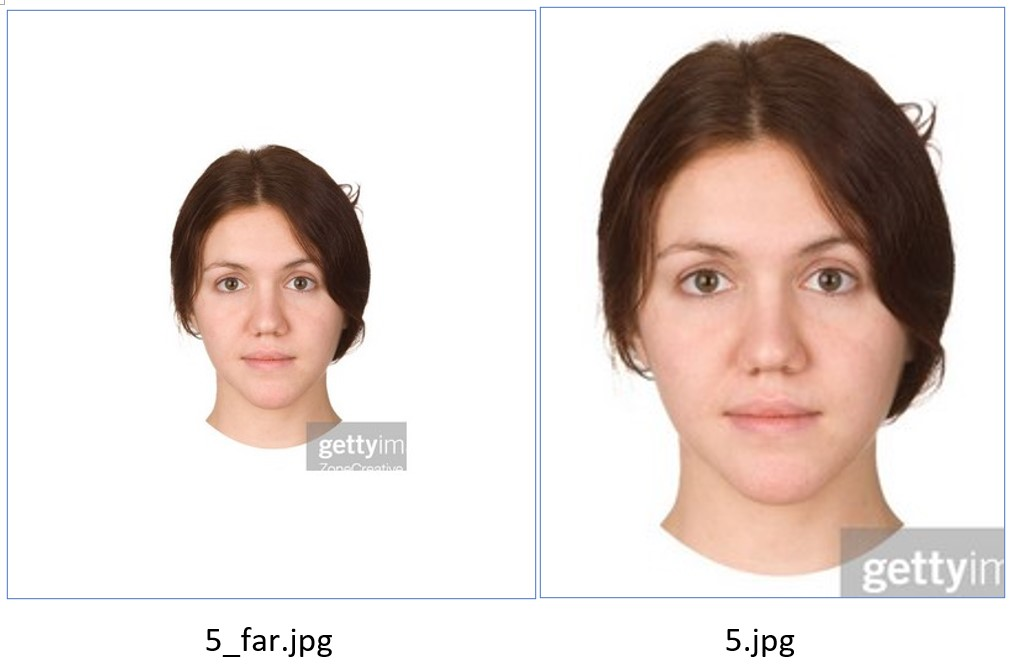

■ 시험용 사진: 절단 test용

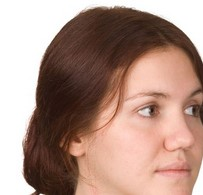

 ■ dlib의 pretrained model 파일 download

In [14]:
!rm -r /content/models
!mkdir -p /content/models
!wget -O /content/models/landmarks.dat.bz2 http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/models/landmarks.dat.bz2
!rm /content/models/landmarks.dat.bz2

--2022-05-26 20:16:06--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/models/landmarks.dat.bz2’

/content/models/lan 100%[===================>]  61.07M  59.6MB/s    in 1.0s    

2022-05-26 20:16:07 (59.6 MB/s) - ‘/content/models/landmarks.dat.bz2’ saved [64040097/64040097]

rm: cannot remove '/content/models/landmarks.dat.bz2': No such file or directory


 ■ Dlib에 사용되는 랜드마크 순서

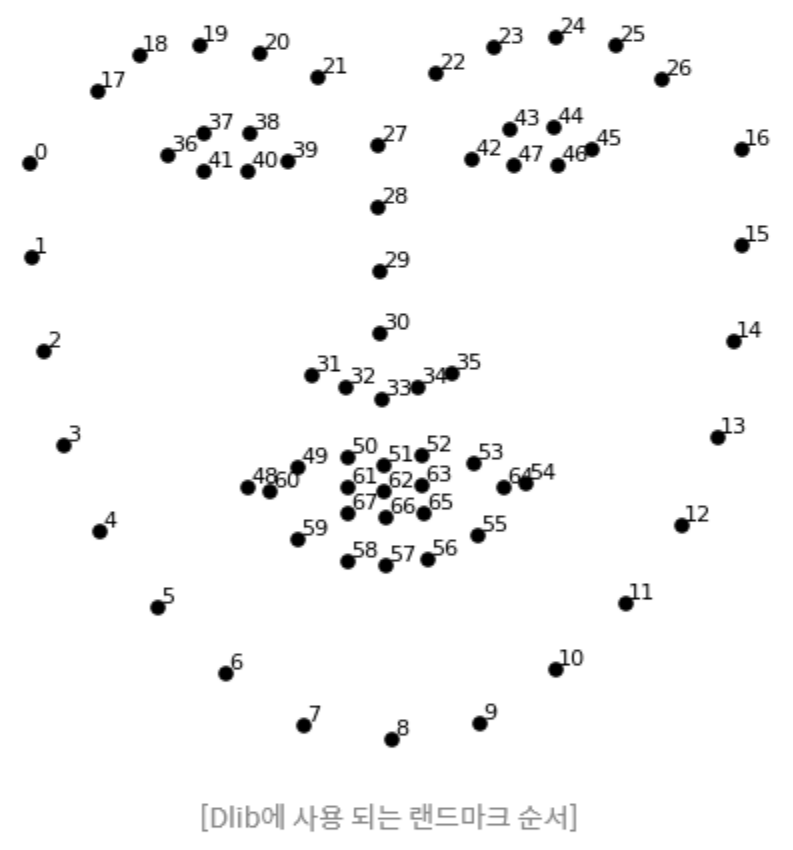

# 2 각도 test

## 2-1. (1)번 각도 test

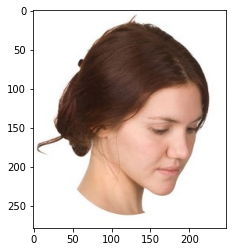

In [9]:
# ■ 시험 사진 load
my_image_path = '/content/images/1.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()              
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h_img = img_rgb.shape[0]    # 사진의 높이
w_img = img_rgb.shape[1]    # 사진의 너비
plt.imshow(img_rgb)
plt.show()

(512, 512, 3)


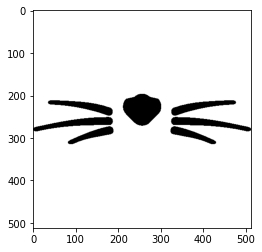

In [26]:
# ■ 시험 스티커 load
sticker_path = '/content/images/CatWhiskers.png'
img_sticker = cv2.imread(sticker_path)
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

rectangles[[(115, 116) (223, 223)]]


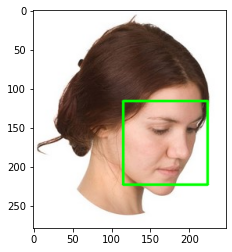

In [12]:
# ■ 얼굴 검출 face detection
# hog detector를 선언
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   
# 박스의 영역을 사진내로 제한
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    if l < 0: 
        l = 0
    t = dlib_rect.top()
    if t < 0:
        t = 0
    r = dlib_rect.right()
    if r > (w_img-1):
        r = (w_img-1)
    b = dlib_rect.bottom()
    if b > (h_img-1):
        b = (h_img-1)
    w_box = r-l+1
    h_box = b-t+1
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

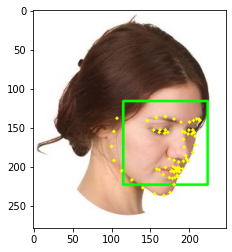

In [16]:
 # ■ 얼굴 landmark
 model_path = '/content/models/landmarks.dat'
 landmark_predictor = dlib.shape_predictor(model_path)
 list_landmarks = []
 for dlib_rect in dlib_rects:
     points = landmark_predictor(img_rgb, dlib_rect)
     list_points = list(map(lambda p: (p.x, p.y), points.parts()))
     list_landmarks.append(list_points)
 for landmark in list_landmarks:
     for point in landmark:
         cv2.circle(img_show, point, 2, (0, 255, 255), -1)
 img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
 plt.imshow(img_show_rgb)
 plt.show()

In [17]:
 # ■ 스티커 적용 위치 확인하기
 # 코의 index는 33기준, 좌표 사용
 for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
     print (landmark[33]) # 코끝의 index 33
     x = landmark[33][0]
     y = landmark[33][1]
     w = 2 * (landmark[54][0] - landmark[48][0])   # 스티커 사진의 너비 계산: 입술양끝에 비례 (54, 48번)
     h = 4 * (landmark[51][1] - landmark[30][1])   # 스티커 사진의 높이 계산: 인중에 비례 (51, 30번)
     print ('(x,y) : (%d,%d)'%(x,y))
     print ('(w,h) : (%d,%d)'%(w,h))

(186, 194)
(x,y) : (186,194)
(w,h) : (58,64)


In [18]:
# ■ 스티커 이미지를 resize하기
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(64, 58, 3)


In [19]:
# ■ 얼굴위치에 맞게 스트커의 중심 이동
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (157,162)


(x,y) : (157,162)
(64, 58, 3)


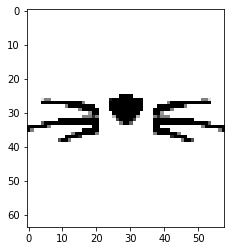

In [20]:
# ■ 얼굴사진내로 스티커 영역 제한
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    w = w + refined_x
    refined_x = 0
if refined_x + (w-1) > (w_img):                            
    # w = w - (refined_x+(w-1)-w_img)
    w = w_img - refined_x
    img_sticker = img_sticker[:, :w]
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    h = h + refined_y
    refined_y = 0
if refined_y + (h-1) > (h_img):                              
    # h = h - (refined_y+(h-1)-h_img)
    h = h_img - refined_y
    img_sticker = img_sticker[:h, :]

print('(x,y) : (%d,%d)'%(refined_x, refined_y))
print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

(64, 58, 3)


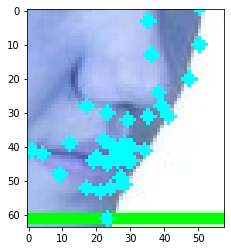

In [21]:
# ■ 얼굴사진의 스티커 영역 계산
sticker_area = img_show[refined_y:refined_y + h, refined_x:refined_x + w]
print(sticker_area.shape)
plt.imshow(sticker_area)
plt.show()

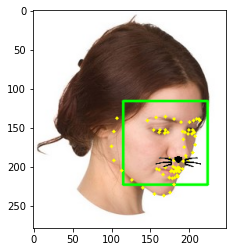

In [22]:
# ■ 얼굴사진과 스티커 사진의 합성
img_show[refined_y:refined_y + h, refined_x:refined_x + w] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

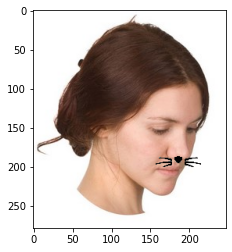

In [23]:
# ■ 최종 합성 사진
sticker_area = img_bgr[refined_y:refined_y + h, refined_x:refined_x + w]

img_bgr[refined_y:refined_y + h, refined_x:refined_x + w] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#
얼굴 각도에 따라 스티커가 어떻게 변해야할까요?          # 각도별
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?        # 거리별
실행 속도가 중요할까요?     # 실행속도?
스티커앱을 만들 때 정확도가 얼마나 중요할까요?  # 정확도가 얼마나 중요할까?
정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
얼굴각도, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.
error상황: 이미지 밝기